In [10]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
# Load Breaast cancer data from sklearn
df = load_breast_cancer()

In [12]:
# print(df)
# Visualiza the data
df.data.shape

(569, 30)

In [13]:
#printing the target vaues
print("Taeget Name:",df.target_names,"\nTarget Shape:",df.target_names.shape)

Taeget Name: ['malignant' 'benign'] 
Target Shape: (2,)


In [14]:
# kmeans algorithm to classify given data
model = KMeans(n_clusters=10, random_state=42)

In [15]:
# Fit and Predict using kmeans
predict = model.fit_predict(df.data)
print(predict)

[9 9 2 1 2 5 2 5 5 5 0 8 8 0 5 0 0 8 7 5 1 4 0 7 7 8 5 8 8 8 2 5 8 9 8 8 5
 1 5 5 5 1 2 5 5 2 4 5 1 5 1 5 1 8 0 1 9 0 1 4 4 4 0 4 5 0 4 1 4 1 9 4 2 5
 1 8 1 2 2 1 1 1 3 8 1 2 5 2 1 5 5 5 5 5 0 2 1 4 1 5 5 4 1 4 4 5 1 1 7 1 4
 1 5 4 4 1 4 0 8 8 1 2 9 5 1 5 5 2 5 2 1 0 8 0 2 1 1 1 0 4 4 8 1 1 4 1 1 5
 5 5 1 4 4 4 5 1 8 0 1 1 1 2 7 1 7 5 4 8 2 5 1 0 0 4 4 4 4 0 1 1 3 9 8 1 0
 4 8 1 1 1 5 1 4 5 5 1 5 8 2 0 1 8 9 0 1 0 4 8 1 0 2 1 3 0 5 5 1 4 9 7 5 5
 4 0 5 5 4 5 1 5 8 1 1 9 4 5 3 9 5 8 5 1 1 5 2 4 1 1 4 1 9 1 9 8 9 5 9 0 8
 0 9 8 8 0 8 3 4 5 1 4 5 1 7 4 8 1 1 8 5 5 2 1 2 0 1 1 1 1 4 1 5 5 1 1 1 5
 4 1 5 4 9 1 2 4 1 1 1 4 5 5 1 5 1 1 4 1 1 2 4 1 4 2 1 9 1 1 5 1 0 0 0 1 4
 1 1 8 1 9 4 3 5 4 4 2 1 4 1 5 1 1 1 0 3 0 1 1 1 5 4 4 1 1 1 0 5 9 2 1 3 7
 8 5 2 9 5 0 4 5 5 1 1 4 1 1 1 5 1 5 1 8 4 4 8 9 1 5 5 1 1 1 8 1 1 1 1 1 0
 1 8 1 1 1 4 5 0 1 4 2 1 1 1 5 1 5 4 4 4 1 4 1 5 1 2 2 5 5 1 5 5 5 1 8 5 4
 8 1 8 5 5 9 1 2 1 5 1 5 1 1 1 4 2 6 5 1 5 5 5 4 8 1 4 1 0 1 4 1 5 5 1 0 1
 5 5 5 0 1 5 2 1 0 1 8 8 

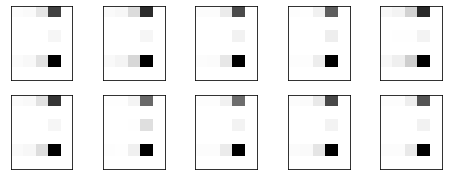

In [16]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = model.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [17]:
# accuracy
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(predict)
for i in range(2):
    mask = (predict==i)
    labels[mask] = mode(df.target[mask])[0]
    
accuracy_score(df.target,labels)

0.6625659050966608

[]

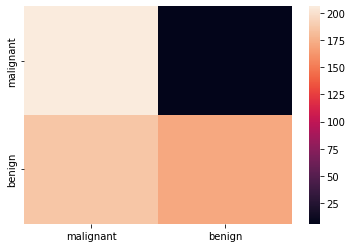

In [18]:
# confusion matrix
cmat = confusion_matrix(df.target,labels)
sns.heatmap(cmat,xticklabels=df.target_names,yticklabels=df.target_names)
plt.plot()